# ДЗ №5 Сегментация
Реализация сети для сегметации объектов.

__Задача__ сделать работоспособную сеть для сегментирования изображений авто на основе предложенного шаблона


![Segmentation](../img/Segment04.png)

### Что делаем
Реализуем сверточную сеть для семантической сегментации, downsample->upsample -> Классификация каждого пикселя выходного изображения: 0 - не авто, 1 - авто. Выход картинка с x каналами, для классификации.
1. В файле model.py   - имплементировать модель вместо заглушки
2. В файле train.py - поставить правильный loss

### Данные
[Carvana](https://cloud.mail.ru/public/3tdq/AvtaHkDAb)

### Зависимости
 - tensorflow  - поддержка tensorboard
 - tensorboardx - тензор боард для pytorch
 - tqdm         - пакет для отрисовки прогресс баров

### Запуск пакета
_ По умолчанию все данные лежат в папке ./data/. Если вы положили их в другую папку, то поправте в скрипте train.py пути _
<br/>
Запускаем обучение сети
python train.py

Результаты обучение можно наблюдать в tensorboard

Запуск tensorboard --log ./od_log

## Результаты
1. Код model.py, train.py
2. Модель state_dicts()

### Тут нужно сделать загрузку состояния вашей модели, код модели в ноутбук тащить не нужно, достаточно сделать import model


In [1]:
import train as t
from model import UNet

import torch.nn.functional as F
from torch import nn
import torch

import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

ModuleNotFoundError: No module named 'train'

In [2]:
DEVICE_ID = 2
DEVICE = torch.device('cuda:%d' % DEVICE_ID)
torch.cuda.set_device(DEVICE_ID)

In [3]:
torch.cuda.current_device()
torch.cuda.get_device_name(DEVICE_ID)

'GeForce GTX 1080 Ti'

In [4]:
import carvana_dataset as cv

log = './log/'
train = 'train/'
train_masks = 'train_masks/'
test = 'test/'
test_masks = 'test_masks/'

ds = cv.CarvanaDataset(train, train_masks) 
ds_test = cv.CarvanaDataset(test, test_masks)

In [5]:
net = UNet()
t.train_net(net, ds, ds_test, net_lr= 0.00004, n_epoch=5, batch_sz=16)
#Сохраняем модель
torch.save(net.state_dict(), "model")

  0%|          | 0/287 [00:00<?, ?it/s]

Current epoch:  0


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.025340423501995453
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.02014438983962292
Current epoch:  1


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.017947554838839575
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.014770634384371165
Current epoch:  2


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.013601889308363068
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.013669270758084424
Current epoch:  3


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.010469045232997711
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.009244117621831067
Current epoch:  4


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.008110223259923239
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.00736251966221126
Current epoch:  5


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.006380273173990208
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.006306991054434476
Current epoch:  6


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.005124744070148885
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0043378766391455655
Current epoch:  7


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.00413232788232086
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0035664555066683163
Current epoch:  8


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0034497929680035104
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0030456491137348762
Current epoch:  9


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.003018331744882998
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0027241778347318565
Current epoch:  10


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0027932205135775445
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0029184855227395307
Current epoch:  11


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0026667470551669336
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0026942385052602124
Current epoch:  12


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0025649957045684995
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.002278270053229933
Current epoch:  13


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0025145527292612336
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0023630248661351016
Current epoch:  14


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0023811400741924364
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.002380339703779286
Current epoch:  15


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0022635862267856776
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0021129173673982695
Current epoch:  16


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.002128047665263888
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0019650311707922322
Current epoch:  17


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.002111742940759815
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0020440150066975533
Current epoch:  18


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0020217620787987543
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0019240239525111173
Current epoch:  19


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0019947757887527934
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.002003581241125197
Current epoch:  20


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0018924177294865445
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.001806161201405009
Current epoch:  21


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0019132801071297394
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0017704860358608988
Current epoch:  22


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0018762107487100962
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0016612231944079005
Current epoch:  23


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0017933445905363716
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0016689068549789311
Current epoch:  24


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0017300056008923
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0017081129723998504
Current epoch:  25


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0016738883488075442
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.00165602766842706
Current epoch:  26


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.001662196205953323
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0016509751811271578
Current epoch:  27


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.001605802172933213
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0015866510408717816
Current epoch:  28


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.001600345724778795
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0015425668318029932
Current epoch:  29


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.001605551630079616
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0015502301572756034
Current epoch:  30


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0015924301205861777
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0014531271363513207
Current epoch:  31


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0016014202969661187
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0016173359673968919
Current epoch:  32


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0015690584040722732
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0016905202962986129
Current epoch:  33


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0015571116445399007
Make test


  0%|          | 0/287 [00:00<?, ?it/s]

Test loss 0.0016369742825333997
Current epoch:  34


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch loss 0.0015769784277768636
Make test


100%|██████████| 32/32 [00:11<00:00,  2.91it/s]


Test loss 0.0015510017323623023


In [9]:
import random
def show_image(img):
    plt.imshow(img.permute(1, 2, 0))

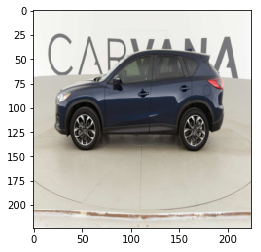

In [28]:
test_sz = 508
i = random.randint(0, test_sz)
img = ds_test[i][0].cuda()
show_image(img)

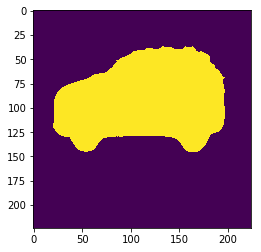

In [29]:
a = net(ds_test[i][0].cuda().unsqueeze(0))
mask = net.predict(img)
plt.imshow(mask)

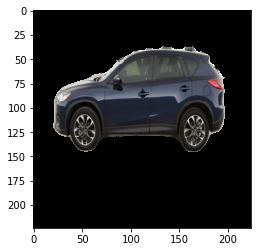

In [30]:
show_image(img *mask)